# Identification of reference layers from meteorological data, 2022-2023

We try to identify "reference layers" from the meteorological data in Finse, winter 2022-2023. These are ice layers that can serve as a common reference to match observational data with the lidar detection curve.

## Imports and functions

In [1]:
%run little_awk_functions.py
%run parameters.py

In get_met_forcing() - Warning: check the format of your file corresponds to the indices given in the functions (wind speed 5, surface temperature 7, time 0).


## Data definition

In [2]:
df = pd.read_pickle('20221001-20220121_finse_meteo_obs.pckl').ffill()
df['snow'] = df['snow'] / 100      # in meters

## Identification of possible ice layers

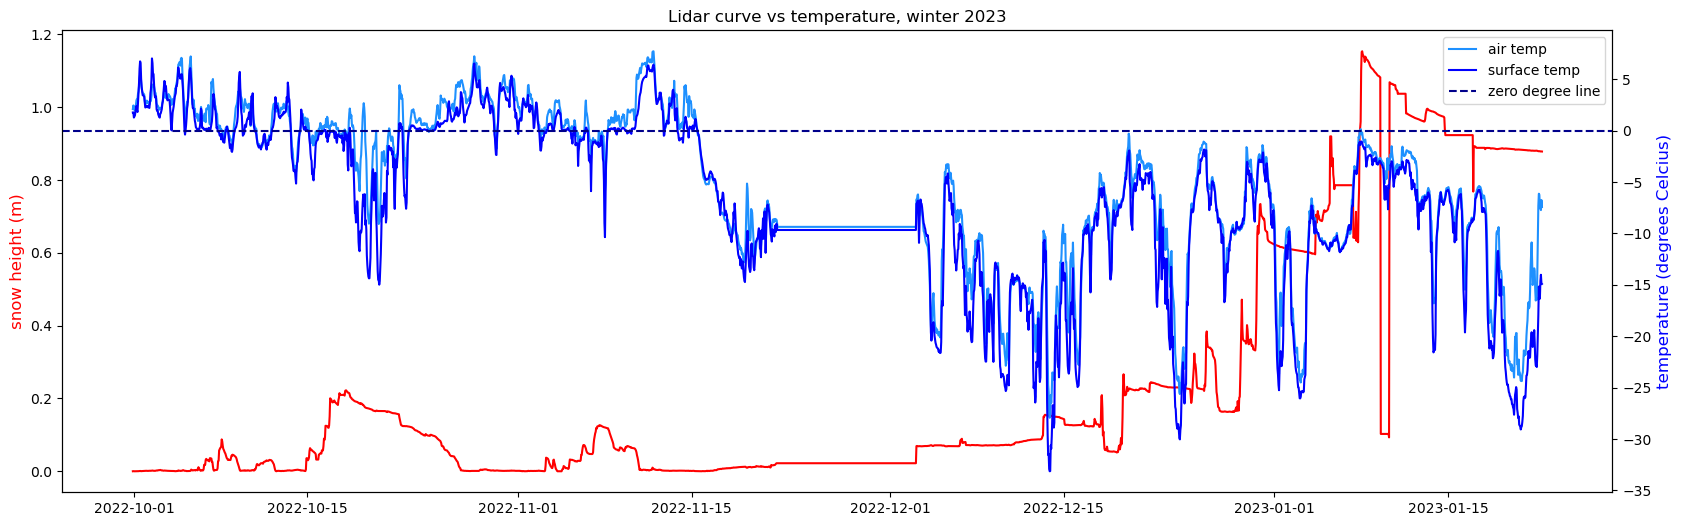

In [3]:
fig,ax = plt.subplots(figsize=(20,6))

# Show snow surface

ax.plot(df['snow'], color='red')
ax.set_ylabel('snow height (m)', color='red', fontsize=12)

# Show temperature evolution (air and surface)

ax2=ax.twinx()
ax2.plot(df['ta'], color='dodgerblue', label='air temp')
ax2.plot(df['tsurf'], color='blue', label='surface temp')
ax2.axhline(y = 0, color = 'darkblue', linestyle = '--', label='zero degree line')
ax2.set_ylabel('temperature (degrees Celcius)', color='blue', fontsize=12)

plt.xlabel('time (date)')
plt.title('Lidar curve vs temperature, winter 2023')

plt.legend()
plt.show()

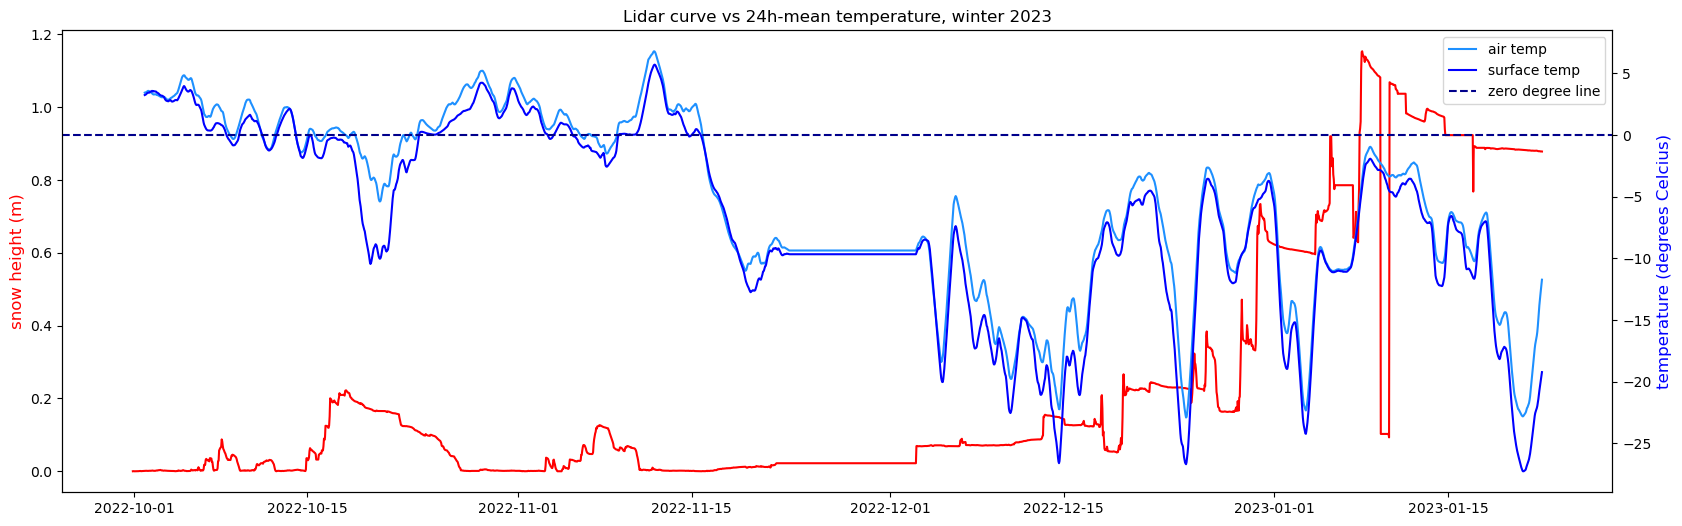

In [4]:
fig,ax = plt.subplots(figsize=(20,6))

# Show snow surface

ax.plot(df['snow'], color='red')
ax.set_ylabel('snow height (m)', color='red', fontsize=12)

# Show 24-hour mean temperature evolution (air and surface)

ax2=ax.twinx()
ax2.plot(df['ta'].rolling(24).mean(), color='dodgerblue', label='air temp')
ax2.plot(df['tsurf'].rolling(24).mean(), color='blue', label='surface temp')
ax2.axhline(y = 0, color = 'darkblue', linestyle = '--', label='zero degree line')
ax2.set_ylabel('temperature (degrees Celcius)', color='blue', fontsize=12)

plt.xlabel('time (date)')
plt.title('Lidar curve vs 24h-mean temperature, winter 2023')

plt.legend()
plt.show()